In [31]:
import pandas as pd
import numpy as np

df=pd.read_csv('train_data.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [33]:
df.select_dtypes(include=['int','float'])    # A function to select a particular datatype from the data set

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,NaN,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


In [34]:
df1=df.copy()

<Axes: ylabel='Age'>

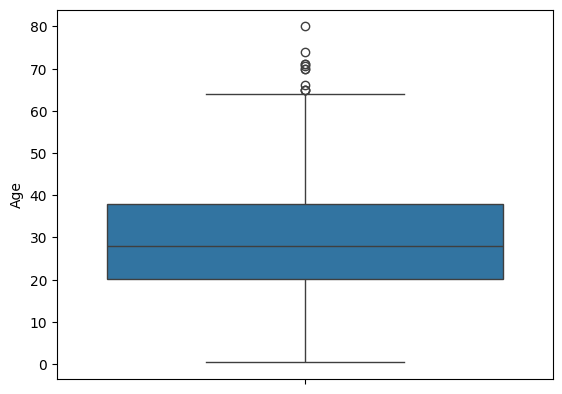

In [35]:
import seaborn as sns
sns.boxplot(df['Age'])

In [36]:
#These are the outliers from the column age now we needto detect them and want to remove them

In [37]:
#detection by IQR Inter quartral range

In [38]:
q1=df1['Age'].quantile(0.25)
q3=df1['Age'].quantile(0.75)

# Q1 (First Quartile): The value below which 25% of the data lies (the 25th percentile).
# Q3 (Third Quartile): The value below which 75% of the data lies (the 75th percentile).

In [39]:
q3 , q1   #The values  beyond these are our outliers (OUTLIER DETECTION)

(np.float64(38.0), np.float64(20.125))

In [40]:
df['Age'].describe()  #25% and 75% same as Above Q3 and Q1

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [41]:
iqr=q3-q1
iqr                #formula - Intel quarter range

np.float64(17.875)

In [42]:
upper_limit=q3+1.5*iqr
lower_limit=q1-1.5*iqr

upper_limit,lower_limit      #formula- Upper limit and lower limit

(np.float64(64.8125), np.float64(-6.6875))

In [43]:
df1[(df1['Age']>upper_limit)|(df1['Age']<lower_limit)]  #(OUTLIERS- ACCORDING TO COlOUM AGE)

#This is how we can do outlier detection

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q
456,457,0,1,"Millet, Mr. Francis Davis",male,65.0,0,0,13509,26.5500,E38,S
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S


In [44]:
# outlier removing

# Trimming: Deletes outliers.
# Capping: Modifies outliers to fit within limits.

In [45]:
# Trimming:

In [46]:
new_df=df1[(df1['Age']<upper_limit)|(df1['Age']>lower_limit)]

In [47]:
new_df  # Directly removing the outliers which are greater from upper limit and lower limit
#This is called Trimming

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<Axes: ylabel='Age'>

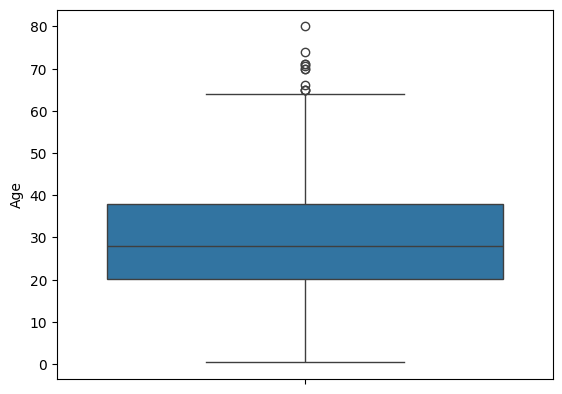

In [48]:
sns.boxplot(new_df['Age'])  #Hence all the outliers get removed

In [49]:
# Capping:

In [50]:
df2=df.copy()

In [51]:
df2['Age']=np.where(df2['Age']>upper_limit,
                    upper_limit,
                    np.where(df2['Age']<lower_limit,
                             lower_limit,
                             df2['Age']
                             )
                    )


#Logic to cap the values Greater than lower limit and upper limit instead of deleting them 
# This is called capping

#If Age > upper_limit, it’s set to upper_limit.
# If Age < lower_limit, it’s set to lower_limit.
# Values within the range remain unchanged.

<Axes: ylabel='Age'>

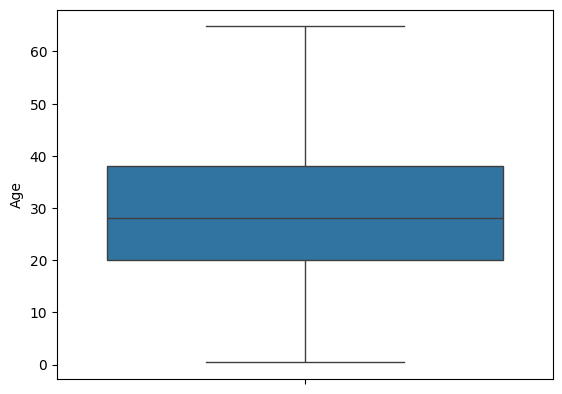

In [52]:
sns.boxplot(df2['Age'])   #Hence all the outliers get removed